# 요인 분석

- 요인 분석
  - 다수의 변수를 대상으로 변수 간의 관계를 분석하여 공통 차원으로 축약하는 통계기법이다. 
  - 탐색적 요인 분석, 확인적 요인 분석
  - 탐색적 요인 분석과 확인적 요인 분석에서 요인 분석은 데이터를 축소하는 변수의 정제 과정이라고 볼 수 있다. 즉, 여러 가지 항목들을 비슷한 항목으로 묶는 것으로 여러 변수 사이에 존재하는 상호관계를 분석하여 타당성을 검정하고 공통으로 속해있는 차원이나 요인들을 밝혀냄으로써 변수를 축소하는 작업이다. 

- 공통요인으로 변수 정제
  - 사전에 묶일 것을오 기대되는 항목끼리 묶이는지를 조사하는 확인적 요인 분석 방법에 대해 알아보자
  - 예를 들면, 과목 수를 줄여서 변수를 정제하는 방법에 대해서 알아보자
  - 특히, 실습 과정에서 특정 항목으로 묶이는데 사용되는 요인 수 결정은 분석 방법과 상관계수 행렬을 이용한 초기 고유값을 이용한다. 

In [3]:
s1 = c(1,2,1,2,3,4,2,3,4,5)
s2 = c(1,3,1,2,3,4,2,4,3,4)
s3 = c(2,3,2,3,2,3,5,3,4,2)
s4 = c(2,4,2,3,2,3,5,3,4,1)
s5 = c(4,5,4,5,2,1,5,2,4,3)
s6 = c(4,3,4,4,2,1,5,2,4,2)
name = 1:10 # 각 과목의 문제에 대한 문항 번호

In [4]:
# 데이터 프레임 생성
subject = data.frame(s1,s2,s3,s4,s5,s6)
str(subject)

'data.frame':	10 obs. of  6 variables:
 $ s1: num  1 2 1 2 3 4 2 3 4 5
 $ s2: num  1 3 1 2 3 4 2 4 3 4
 $ s3: num  2 3 2 3 2 3 5 3 4 2
 $ s4: num  2 4 2 3 2 3 5 3 4 1
 $ s5: num  4 5 4 5 2 1 5 2 4 3
 $ s6: num  4 3 4 4 2 1 5 2 4 2


- 만약 각 변수의 값이 일정하지 않으면 표준화 작업이 필요하다. 여기서는 모든 변수가 5점 척도로 일정하기 때문에 표준화 작업이 필요하진 않다. 

- 변수의 주성분 분석
  - 주성분 분석은 변동량(분산)에 영향을 주는 주요 성분을 분석하는 방법으로 요인 분석에서 사용될 요인의 개수를 결정하는 데 주로 이용된다. 주성분 분석의 결과는 첫 차원이 대부분의 변동량을 담고 있는 것으로 나타난다. 
- 요인 분석에서 공통요인으로 묶일 요인 수를 알아보자

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6
Standard deviation     2.389 1.5532 0.87727 0.56907 0.19315 0.12434
Proportion of Variance 0.616 0.2603 0.08305 0.03495 0.00403 0.00167
Cumulative Proportion  0.616 0.8763 0.95936 0.99431 0.99833 1.00000

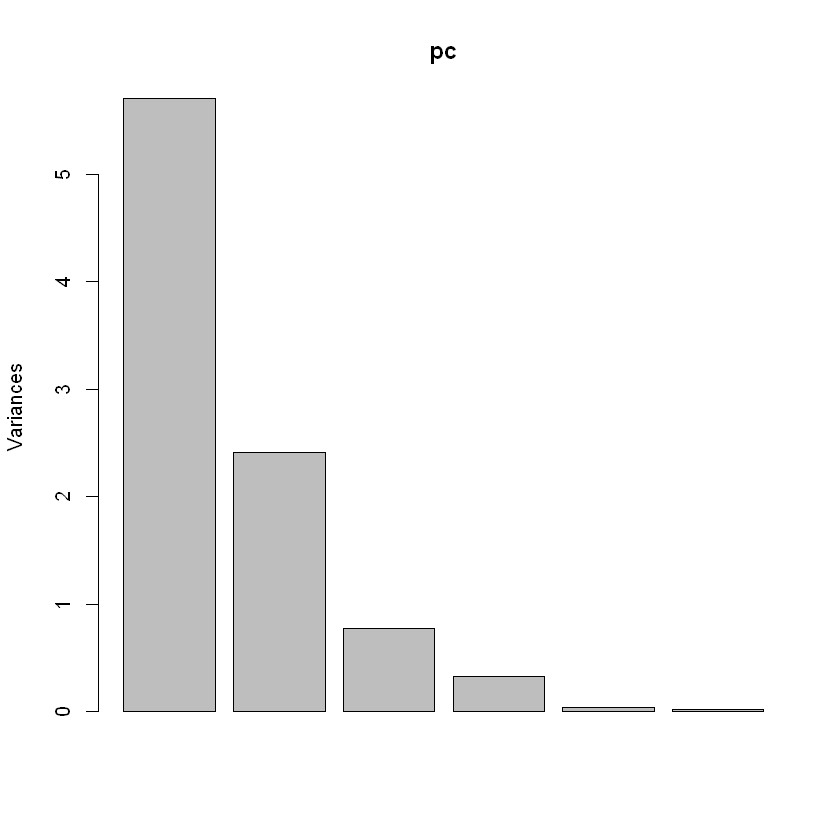

In [7]:
pc = prcomp(subject) # 주성분 분석 수행 함수
summary(pc) # 요약통계량
plot(pc) # 주성분 분석 결과 시각화

- 첫 번째 성분이 변동량 62%, 두 번째 성분이 26%를 차지하여 전체 88%를 차지.
- 따라서 전체 6개 성분 중에서 일단 주성분 변수를 2개로 가정할 수 있다. 
- 주성분 분석에서 결정된 주성분의 수를 반드시 요인 분석에서 요인의 수로 사용되지는 않는다. 
- 고유값 : 어떤 행렬로부터 유도되는 실수값. 일반적으로 변화량의 합(총분산)을 기준으로 요인의 수를 결정하는 데 이용된다. 
- 상관계수 행렬을 대상으로 초기 고유값으로 요인 수를 알아보자

In [8]:
cor(subject)

,s1,s2,s3,s4,s5,s6
s1,1.00000000,0.86692145,0.05847768,-0.1595953,-0.5504588,-0.6262758
s2,0.86692145,1.00000000,0.06745441,-0.0240123,-0.6349581,-0.7968892
s3,0.05847768,0.06745441,1.00000000,0.9239433,0.3506967,0.4428759
s4,-0.15959528,-0.02401230,0.92394333,1.0000000,0.4207582,0.4399890
s5,-0.55045878,-0.63495808,0.35069667,0.4207582,1.0000000,0.8733514
s6,-0.62627585,-0.79688923,0.44287589,0.4399890,0.8733514,1.0000000


In [11]:
# 고유값으로 요인 수 분석
en = eigen(cor(subject))
en # 이때 values는 고유값, vectors는 고유벡터이다. 

eigen() decomposition
$values
[1] 3.44393944 1.88761725 0.43123968 0.19932073 0.02624961 0.01163331

$vectors
           [,1]         [,2]        [,3]       [,4]        [,5]        [,6]
[1,] -0.4062499 -0.351093036  0.63460534  0.3149622  0.45699508  0.03041553
[2,] -0.4319311 -0.400526644  0.11564711 -0.4422216 -0.57042232  0.34452594
[3,]  0.2542077 -0.628807884 -0.06984072  0.3339036 -0.35389906 -0.54622817
[4,]  0.3017115 -0.566028650 -0.37734321 -0.2468016  0.50326085  0.36333366
[5,]  0.4763815  0.008436692  0.58035475 -0.6016209  0.05643527 -0.26654314
[6,]  0.5155637  0.021286661  0.31595023  0.4133867 -0.28995329  0.61559319


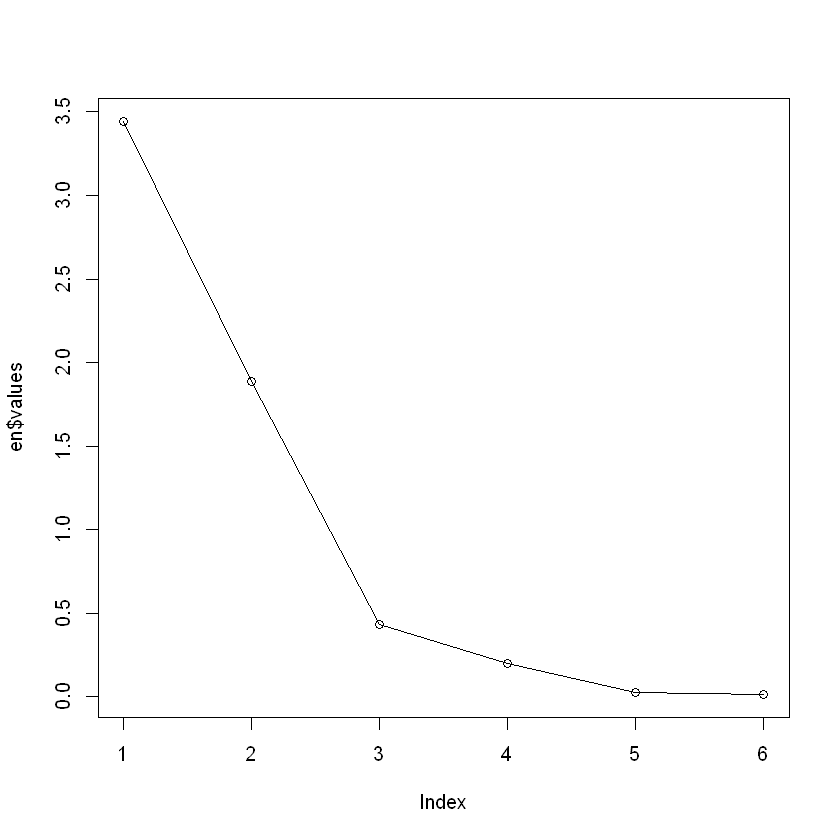

In [12]:
# 고유값을 이용한 시각화
plot(en$values, type='o')

- 1~3까지의 고유값을 급격하게 감소하다가 4번째 고유값에서 완만하게 감소한다는 측면에서 주성분 변수를 3개로 가정할 수 있다.

In [13]:
cor(subject)

,s1,s2,s3,s4,s5,s6
s1,1.00000000,0.86692145,0.05847768,-0.1595953,-0.5504588,-0.6262758
s2,0.86692145,1.00000000,0.06745441,-0.0240123,-0.6349581,-0.7968892
s3,0.05847768,0.06745441,1.00000000,0.9239433,0.3506967,0.4428759
s4,-0.15959528,-0.02401230,0.92394333,1.0000000,0.4207582,0.4399890
s5,-0.55045878,-0.63495808,0.35069667,0.4207582,1.0000000,0.8733514
s6,-0.62627585,-0.79688923,0.44287589,0.4399890,0.8733514,1.0000000


- s1,s2 // s3,s4 // s5,s6 즉, 동일 계열의 과목점수에 대한 상관계수가 높은 것으로 나타난다. 요인 분석은 기본적으로 상관계수를 토대로 공통요인을 추출한다.

---

- 요인 분석에서 요인 회전법은 요인 해석이 어려운 경우 요인축을 회전시켜서 요인 해석을 용이하게 하는 방법이다. 베리멕스 회전법이 있다. 

In [14]:
# 주성분 분석의 가정에 의해서 2개 요인으로 분석
result = factanal(subject, factors=2, rotation = 'varimax')
result


Call:
factanal(x = subject, factors = 2, rotation = "varimax")

Uniquenesses:
   s1    s2    s3    s4    s5    s6 
0.250 0.015 0.005 0.136 0.407 0.107 

Loadings:
   Factor1 Factor2
s1  0.862         
s2  0.988         
s3          0.997 
s4 -0.115   0.923 
s5 -0.692   0.338 
s6 -0.846   0.421 

               Factor1 Factor2
SS loadings      2.928   2.152
Proportion Var   0.488   0.359
Cumulative Var   0.488   0.847

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 11.32 on 4 degrees of freedom.
The p-value is 0.0232 

- p-value 값이 0.05미만이면 요인수가 부족하다는 의미이기 때문에 요인수를 늘려서 다시 분석해야한다. 
- 요인수를 늘려보자

In [16]:
# 고유값으로 가정한 3개 요인으로 분석
result = factanal(subject, factors=3, rotation = 'varimax', scores = 'regression') # scores = 요인점수 계산방법
result


Call:
factanal(x = subject, factors = 3, scores = "regression", rotation = "varimax")

Uniquenesses:
   s1    s2    s3    s4    s5    s6 
0.005 0.056 0.051 0.005 0.240 0.005 

Loadings:
   Factor1 Factor2 Factor3
s1 -0.379           0.923 
s2 -0.710   0.140   0.649 
s3  0.236   0.931   0.166 
s4  0.120   0.983  -0.118 
s5  0.771   0.297  -0.278 
s6  0.900   0.301  -0.307 

               Factor1 Factor2 Factor3
SS loadings      2.122   2.031   1.486
Proportion Var   0.354   0.339   0.248
Cumulative Var   0.354   0.692   0.940

The degrees of freedom for the model is 0 and the fit was 0.7745 

In [17]:
# 다양한 방법으로 요인 적재량 보기
attributes(result) # 결과변수 속성 보기

$names
 [1] "converged"    "loadings"     "uniquenesses" "correlation"  "criteria"    
 [6] "factors"      "dof"          "method"       "rotmat"       "scores"      
[11] "n.obs"        "call"        

$class
[1] "factanal"

In [18]:
result$loadings


Loadings:
   Factor1 Factor2 Factor3
s1 -0.379           0.923 
s2 -0.710   0.140   0.649 
s3  0.236   0.931   0.166 
s4  0.120   0.983  -0.118 
s5  0.771   0.297  -0.278 
s6  0.900   0.301  -0.307 

               Factor1 Factor2 Factor3
SS loadings      2.122   2.031   1.486
Proportion Var   0.354   0.339   0.248
Cumulative Var   0.354   0.692   0.940

In [19]:
# 요인부하량 0.5 이상, 소수점 2자리 표기
print(result, digits=2, cutoff=0.5)


Call:
factanal(x = subject, factors = 3, scores = "regression", rotation = "varimax")

Uniquenesses:
  s1   s2   s3   s4   s5   s6 
0.00 0.06 0.05 0.00 0.24 0.00 

Loadings:
   Factor1 Factor2 Factor3
s1                  0.92  
s2 -0.71            0.65  
s3          0.93          
s4          0.98          
s5  0.77                  
s6  0.90                  

               Factor1 Factor2 Factor3
SS loadings       2.12    2.03    1.49
Proportion Var    0.35    0.34    0.25
Cumulative Var    0.35    0.69    0.94

The degrees of freedom for the model is 0 and the fit was 0.7745 


In [20]:
# 모든 요인적재량 보기 : 감추어진 요인적재량 보기
print(result$loadings, cutoff = 0)


Loadings:
   Factor1 Factor2 Factor3
s1 -0.379  -0.005   0.923 
s2 -0.710   0.140   0.649 
s3  0.236   0.931   0.166 
s4  0.120   0.983  -0.118 
s5  0.771   0.297  -0.278 
s6  0.900   0.301  -0.307 

               Factor1 Factor2 Factor3
SS loadings      2.122   2.031   1.486
Proportion Var   0.354   0.339   0.248
Cumulative Var   0.354   0.692   0.940


- 요인 분석에서 요인점수(요인 분석에서 요인의 추정된 값)를 얻기 위해서는 scores 속성 (scores = 'regression')을 지정해야 한다. 
- 요인 점수를 통해서 요인적재량을 시각화해보자

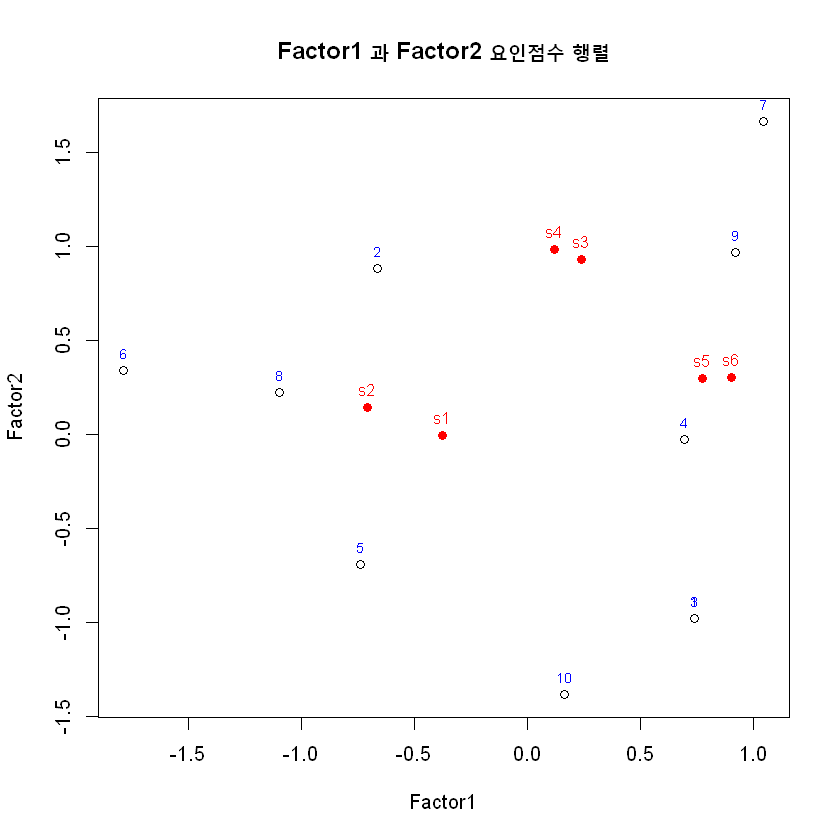

In [24]:
plot(result$scores[,c(1,2)], main = 'Factor1 과 Factor2 요인점수 행렬')
# 산점도에 레이블 표시
text(result$scores[,1],result$scores[,2], labels = name, cex = 0.7, pos = 3, col = 'blue')

# 요인 적재량 추가
points(result$loadings[,c(1,2)],pch = 19, col = 'red')
text(result$loadings[,1], result$loadings[,2], labels = rownames(result$loadings), cex =  0.8, pos=3, col='red')

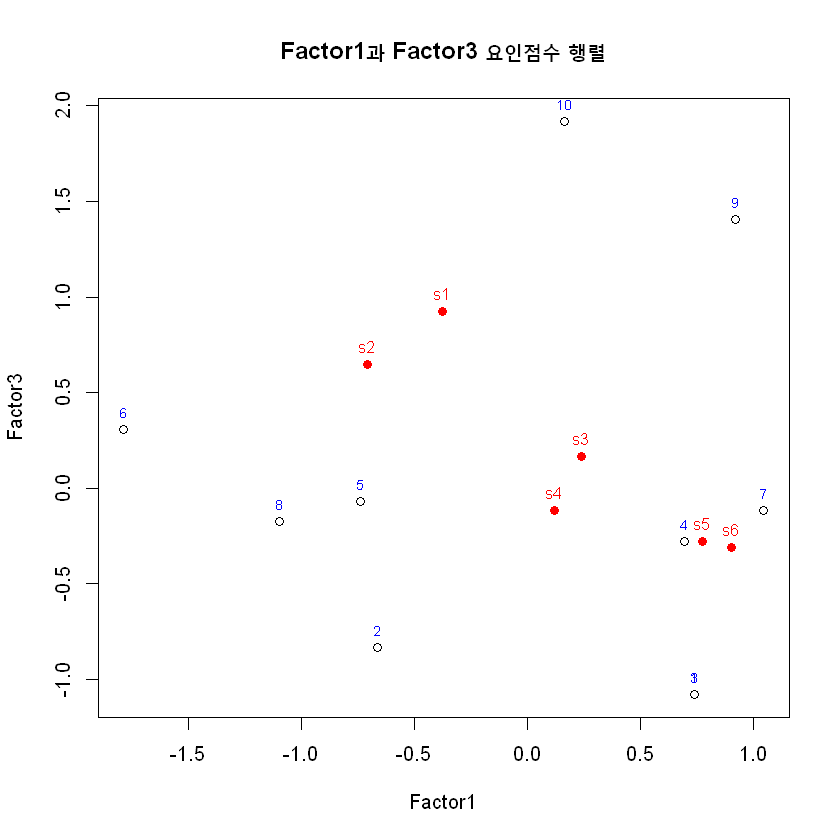

In [26]:
# Factor1과 Factor3 요인적재량 시각화
plot(result$scores[,c(1,3)], main = 'Factor1과 Factor3 요인점수 행렬')
# 산점도에 레이블 표시
text(result$scores[,1], result$scores[,3], labels = name, cex = 0.7, pos=3, col = 'blue')
# 요인적재량 추가
points(result$loadings[,c(1,3)],pch = 19, col = 'red')
# 요인적재량 레이블 표시
text(result$loadings[,1], result$loadings[,3], labels = rownames(result$loadings), cex = 0.8, pos =3, col = 'red')

- 3차원 산점도로 요인적재량 시각화

In [27]:
library(scatterplot3d)

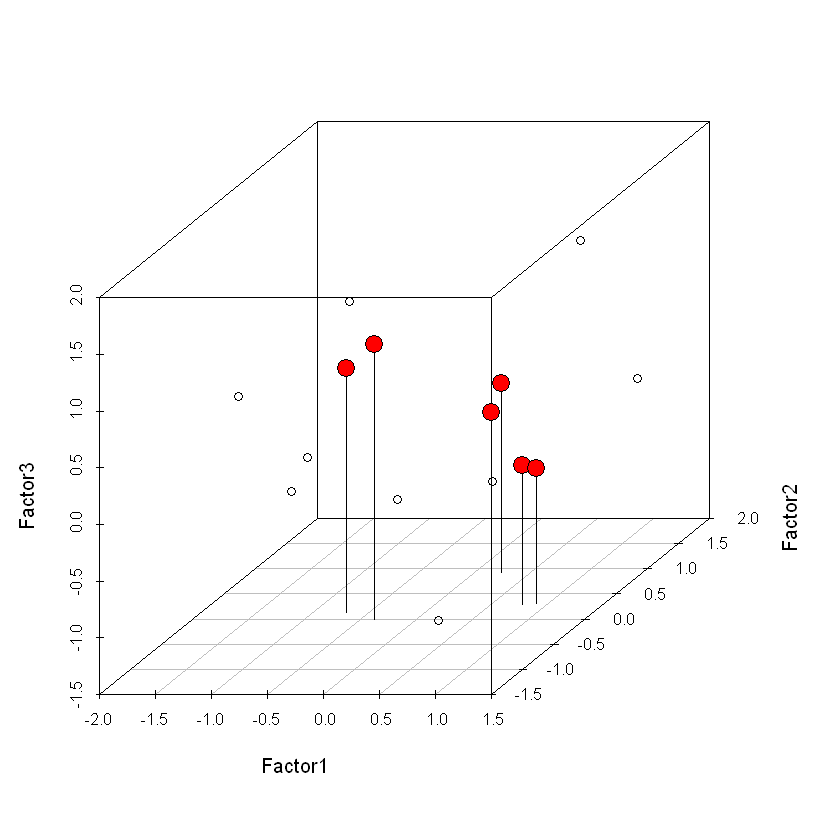

In [31]:
Factor1 = result$scores[,1]
Factor2 = result$scores[,2]
Factor3 = result$scores[,3]

d3 = scatterplot3d(Factor1,Factor2,Factor3, type = 'p')

# 요인적재량 표시
loadings1 = result$loadings[,1]
loadings2 = result$loadings[,2]
loadings3 = result$loadings[,3]
d3$points3d(loadings1,loadings2,loadings3, bg = 'red', pch= 21, cex= 2, type = 'h')

- 요인별 변수 묶기
  - 요인 분석을 통해서 각 요인에 속하는 입력변수들을 묶어서 파생변수를 생성할 수 있는데 이러한 파생변수는 상관분석이나 회귀분석에서 독립변수로 사용할 수 있다. 파생변수는 가독성과 석득력이 가장 높은 산술평균 방식을 적용하여 생성할 수 있다. 
- Factor1,Factor2,Factor3은 각각 응용과학, 응용수학, 자연과학이라는 과목명이다.

In [34]:
# 1단계 : 요인별 과목 변수 이용 데이터프레임 생성
app = data.frame(subject$s5, subject$s6)
soc = data.frame(subject$s3, subject$s4)
nat = data.frame(subject$s1, subject$s2)

# 2단계 : 요인별 산술평균 계산
app_science = round((app$subject.s5 + app$subject.s6)/ncol(app),2)
soc_science = round((soc$subject.s3 + soc$subject.s4)/ncol(soc),2)
nat_science = round((nat$subject.s1 + nat$subject.s2)/ncol(nat),2)

# 3단계 : 상관관계 분석
subject_factor_df = data.frame(app_science,soc_science,nat_science)
cor(subject_factor_df)

,app_science,soc_science,nat_science
app_science,1.0000000,0.43572654,-0.68903024
soc_science,0.4357265,1.00000000,-0.02570212
nat_science,-0.6890302,-0.02570212,1.00000000


- 요인 분석을 통해서 만들어진 파생변수는 상관분석이나 회귀분석에서 독립변수로 사용할 수 있다.

---

- 잘못 분류된 요인 제거로 변수 정제
  - 음료수 제품을 대상으로 3가지 영역(친밀도, 적절성, 만족도)으로 작성된 11개 변수를 대상으로 요인 분석을 실습한다.
  - 특히 특정 변수가 묶여질 것으로 예상되는 요인으로 묶이지 않는 경우 해당 변수를 제거하여 변수를 정제하는 방법에 대해서 알아본다. 

In [35]:
install.packages('memisc')
library(memisc)
data.spss = as.data.set(spss.system.file('drinking_water.sav'))
data.spss[1:11]

package 'memisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\Rtmp0kM9mA\downloaded_packages


Loading required package: lattice

Loading required package: MASS


Attaching package: 'memisc'


The following objects are masked from 'package:stats':

    contr.sum, contr.treatment, contrasts


The following object is masked from 'package:base':

    as.array


File character set is 'ASCII'.

Converting character set to the local 'cp949'.



Data set with 380 observations and 11 variables

   Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10 Q11
 1  3  2  3  3  4  3  4  3  4   3   4
 2  3  3  3  3  3  3  2  3  3   2   3
 3  3  3  3  4  3  4  3  4  4   4   4
 4  3  3  3  1  3  2  3  2  2   2   2
 5  3  3  2  2  3  3  2  2  2   2   2
 6  1  1  1  1  1  1  1  3  3   3   3
 7  2  2  2  3  2  3  5  4  4   4   4
 8  2  2  1  2  1  2  1  2  2   2   2
 9  2  2  1  2  3  3  1  3  2   3   1
10  4  3  3  3  4  3  3  4  2   3   4
11  3  4  4  3  4  4  4  5  5   5   5
12  2  1  1  2  2  2  1  4  4   5   5
13  1  1  1  2  1  1  1  1  1   1   1
14  2  3  2  2  3  1  2  3  2   2   2
15  1  2  2  1  1  1  1  2  2   2   2
16  3  2  2  2  3  2  2  2  2   2   1
17  3  3  3  3  2  3  2  3  3   3   3
18  3  3  3  3  2  2  2  2  3   3   2
19  3  3  2  2  3  2  2  3  3   3   3
20  4  4  4  4  4  4  3  4  4   4   4
21  3  4  2  1  1  1  1  3  2   3   1
22  4  2  2  1  1  1  1  3  4   4   1
23  3  3  2  2  2  2  3  2  3   3   3
24  2  2  2  2  2  3  1  4  4   4   2
25  2  2  2  2  2  2  3  4  3   3   3
.. .. .. .. .. .. .. .. .. .. ... ...
(25 of 380 observations shown)

In [36]:
# 데이터 프레임으로 변경
drinking_water = data.spss[1:11]
drinking_water_df = as.data.frame(data.spss[1:11])
str(drinking_water_df)

'data.frame':	380 obs. of  11 variables:
 $ Q1 : num  3 3 3 3 3 1 2 2 2 4 ...
  ..- attr(*, "label")= chr "A&G0 D#9P551"
 $ Q2 : num  2 3 3 3 3 1 2 2 2 3 ...
  ..- attr(*, "label")= chr "A&G0 D#9P552"
 $ Q3 : num  3 3 3 3 2 1 2 1 1 3 ...
  ..- attr(*, "label")= chr "A&G0 D#9P553"
 $ Q4 : num  3 3 4 1 2 1 3 2 2 3 ...
  ..- attr(*, "label")= chr "A&G0 D#9P554"
 $ Q5 : num  4 3 3 3 3 1 2 1 3 4 ...
  ..- attr(*, "label")= chr "A&G0 @{@}<:1"
 $ Q6 : num  3 3 4 2 3 1 3 2 3 3 ...
  ..- attr(*, "label")= chr "A&G0 @{@}<:2"
 $ Q7 : num  4 2 3 3 2 1 5 1 1 3 ...
  ..- attr(*, "label")= chr "A&G0 @{@}<:3"
 $ Q8 : num  3 3 4 2 2 3 4 2 3 4 ...
  ..- attr(*, "label")= chr "A&G0 88A7551"
 $ Q9 : num  4 3 4 2 2 3 4 2 2 2 ...
  ..- attr(*, "label")= chr "A&G0 88A7552"
 $ Q10: num  3 2 4 2 2 3 4 2 3 3 ...
  ..- attr(*, "label")= chr "A&G0 88A7553"
 $ Q11: num  4 3 4 2 2 3 4 2 1 4 ...
  ..- attr(*, "label")= chr "A&G0 88A7554"


- 요인 수를 3개로 지정하여 요인 분석 수행

In [37]:
result2 = factanal(drinking_water_df, factor = 3, rotation = 'varimax')
result2


Call:
factanal(x = drinking_water_df, factors = 3, rotation = "varimax")

Uniquenesses:
   Q1    Q2    Q3    Q4    Q5    Q6    Q7    Q8    Q9   Q10   Q11 
0.321 0.238 0.284 0.447 0.425 0.373 0.403 0.375 0.199 0.227 0.409 

Loadings:
    Factor1 Factor2 Factor3
Q1  0.201   0.762   0.240  
Q2  0.172   0.813   0.266  
Q3  0.141   0.762   0.340  
Q4  0.250   0.281   0.641  
Q5  0.162   0.488   0.557  
Q6  0.224   0.312   0.693  
Q7  0.235   0.219   0.703  
Q8  0.695   0.225   0.304  
Q9  0.873   0.122   0.155  
Q10 0.852   0.144   0.161  
Q11 0.719   0.152   0.225  

               Factor1 Factor2 Factor3
SS loadings      2.772   2.394   2.133
Proportion Var   0.252   0.218   0.194
Cumulative Var   0.252   0.470   0.664

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 40.57 on 25 degrees of freedom.
The p-value is 0.0255 